In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pickle
from collections import Counter
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# train data

In [2]:
train_df= pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/b_processed_labeled/train.csv', encoding='utf-8')
train_df.shape

(32172, 2)

In [3]:
#labeling
reviews = np.array(train_df['text'])[:]
labels = np.array(train_df['sentiment'])[:]
print(Counter(labels))

Counter({'sadness': 5362, 'anger': 5362, 'love': 5362, 'surprise': 5362, 'fear': 5362, 'joy': 5362})


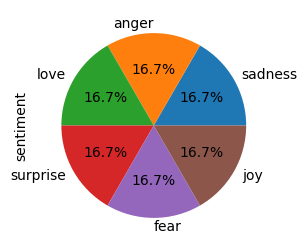

In [4]:
#plot_train data
import matplotlib.pyplot as plt
label_count = train_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

# test data

In [5]:
test_df= pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/b_processed_labeled/test.csv', encoding='utf-8')
test_df.shape

(4170, 2)

In [6]:
#labeling
reviews = np.array(test_df['text'])[:]
labels = np.array(test_df['sentiment'])[:]
print(Counter(labels))

Counter({'sadness': 695, 'joy': 695, 'fear': 695, 'anger': 695, 'love': 695, 'surprise': 695})


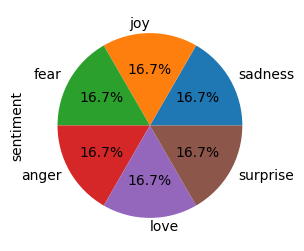

In [7]:
#plot test data
import matplotlib.pyplot as plt
label_count = test_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

# Cleaning

In [8]:
def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase

    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]
    
    return ' '.join(stems)

def tokenize(text):
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)
    
    return tokens
    

# Vectorizer tf-idf

In [9]:
# cv = TfidfVectorizer(lowercase=True, preprocessor=clean_text, stop_words='english',
#                      ngram_range=(1,3), tokenizer=tokenize)
# text_counts = cv.fit_transform(train_df['text'].values.astype('U'))

# x_train, x_test, y_train, y_test = train_test_split(text_counts, train_df['sentiment'],
#                                                     stratify=train_df['sentiment'], test_size=0.3, shuffle=True)

In [10]:
# Define the vectorizer and fit it to the training data
cv = TfidfVectorizer(lowercase=True, preprocessor=clean_text, stop_words='english',
                             ngram_range=(1,3), tokenizer=tokenize)

x_train = cv.fit_transform(train_df['text'].values.astype('U'))
y_train = train_df['sentiment']

# Vectorize the test data using the same vectorizer
x_test = cv.transform(test_df['text'].values.astype('U'))
y_test = test_df['sentiment']

In [ ]:
def performance_evaluation():

#def Classification_report():
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    
#def conf_matrix_img():    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("")
    #Normalized Confusion Matrix
    nconf_matrix = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis],1)
    print(nconf_matrix)    

#def heatmap_image():    
    le = LabelEncoder()
    le.fit(labels)
    class_labels = le.classes_
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 18))
    sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=class_labels, yticklabels=class_labels, ax=ax1)
    ax1.set_xlabel("Predicted labels")
    ax1.set_ylabel("True labels")
    ax1.set_title("Confusion Matrix")
    sns.heatmap(nconf_matrix, annot=True, cmap=plt.cm.Greens, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, ax=ax2)
    ax2.set_xlabel("Predicted labels")
    ax2.set_ylabel("True labels")
    ax2.set_title("Normalized")
    # Add some space between the subplots
    plt.subplots_adjust(wspace=1)

    # Set the aspect ratio to "equal"
    ax1.set_aspect("equal")
    ax2.set_aspect("equal")

    # Save the chart to a file
    #plt.savefig('../spam_filter/docs/images/combined_heatmaps.jpeg',transparent=False,
    #bbox_inches='tight', pad_inches=0.1)
    plt.show()

# Try can compare several Machine Learning Models

## Multinomial Naive Bayes Classifier

In [11]:
#Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7628297362110312

# Bernoulli NB

In [12]:
#Ber_NB
from sklearn.naive_bayes import *
from sklearn import metrics
clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7697841726618705

# Logistic Regression

In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8556354916067146

# Linear SVC

In [14]:
#Linear SVC
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8345323741007195

# Linear SVC + L2 Regulation + Cross Validation

In [15]:
clf = svm.LinearSVC(penalty='l2', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L2 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.95934353 0.9564839  0.96655477 0.97438767]
Average Cross Validation Score:  0.9641924654979485
Accuracy with L2 regularization and cross validation:  0.8628297362110312


# Linear SVC + L1 Regulation + Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
clf = svm.LinearSVC(penalty='l1', loss='squared_hinge', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L1 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.91495711 0.9129678  0.91918438 0.9129678 ]
Average Cross Validation Score:  0.9150192714161384
Accuracy with L1 regularization and cross validation:  0.8839328537170263


              precision    recall  f1-score   support

       anger       0.89      0.91      0.90       695
        fear       0.88      0.83      0.85       695
         joy       0.88      0.85      0.86       695
        love       0.87      0.87      0.87       695
     sadness       0.94      0.90      0.92       695
    surprise       0.85      0.94      0.90       695

    accuracy                           0.88      4170
   macro avg       0.88      0.88      0.88      4170
weighted avg       0.88      0.88      0.88      4170

[[633  20  10  10  15   7]
 [ 29 579   2   0  12  73]
 [ 10   5 589  67   5  19]
 [ 16  12  44 606   8   9]
 [ 24  18  14  10 624   5]
 [  0  27  13   0   0 655]]

[[0.9 0.  0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0.  0.1]
 [0.  0.  0.8 0.1 0.  0. ]
 [0.  0.  0.1 0.9 0.  0. ]
 [0.  0.  0.  0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.9]]


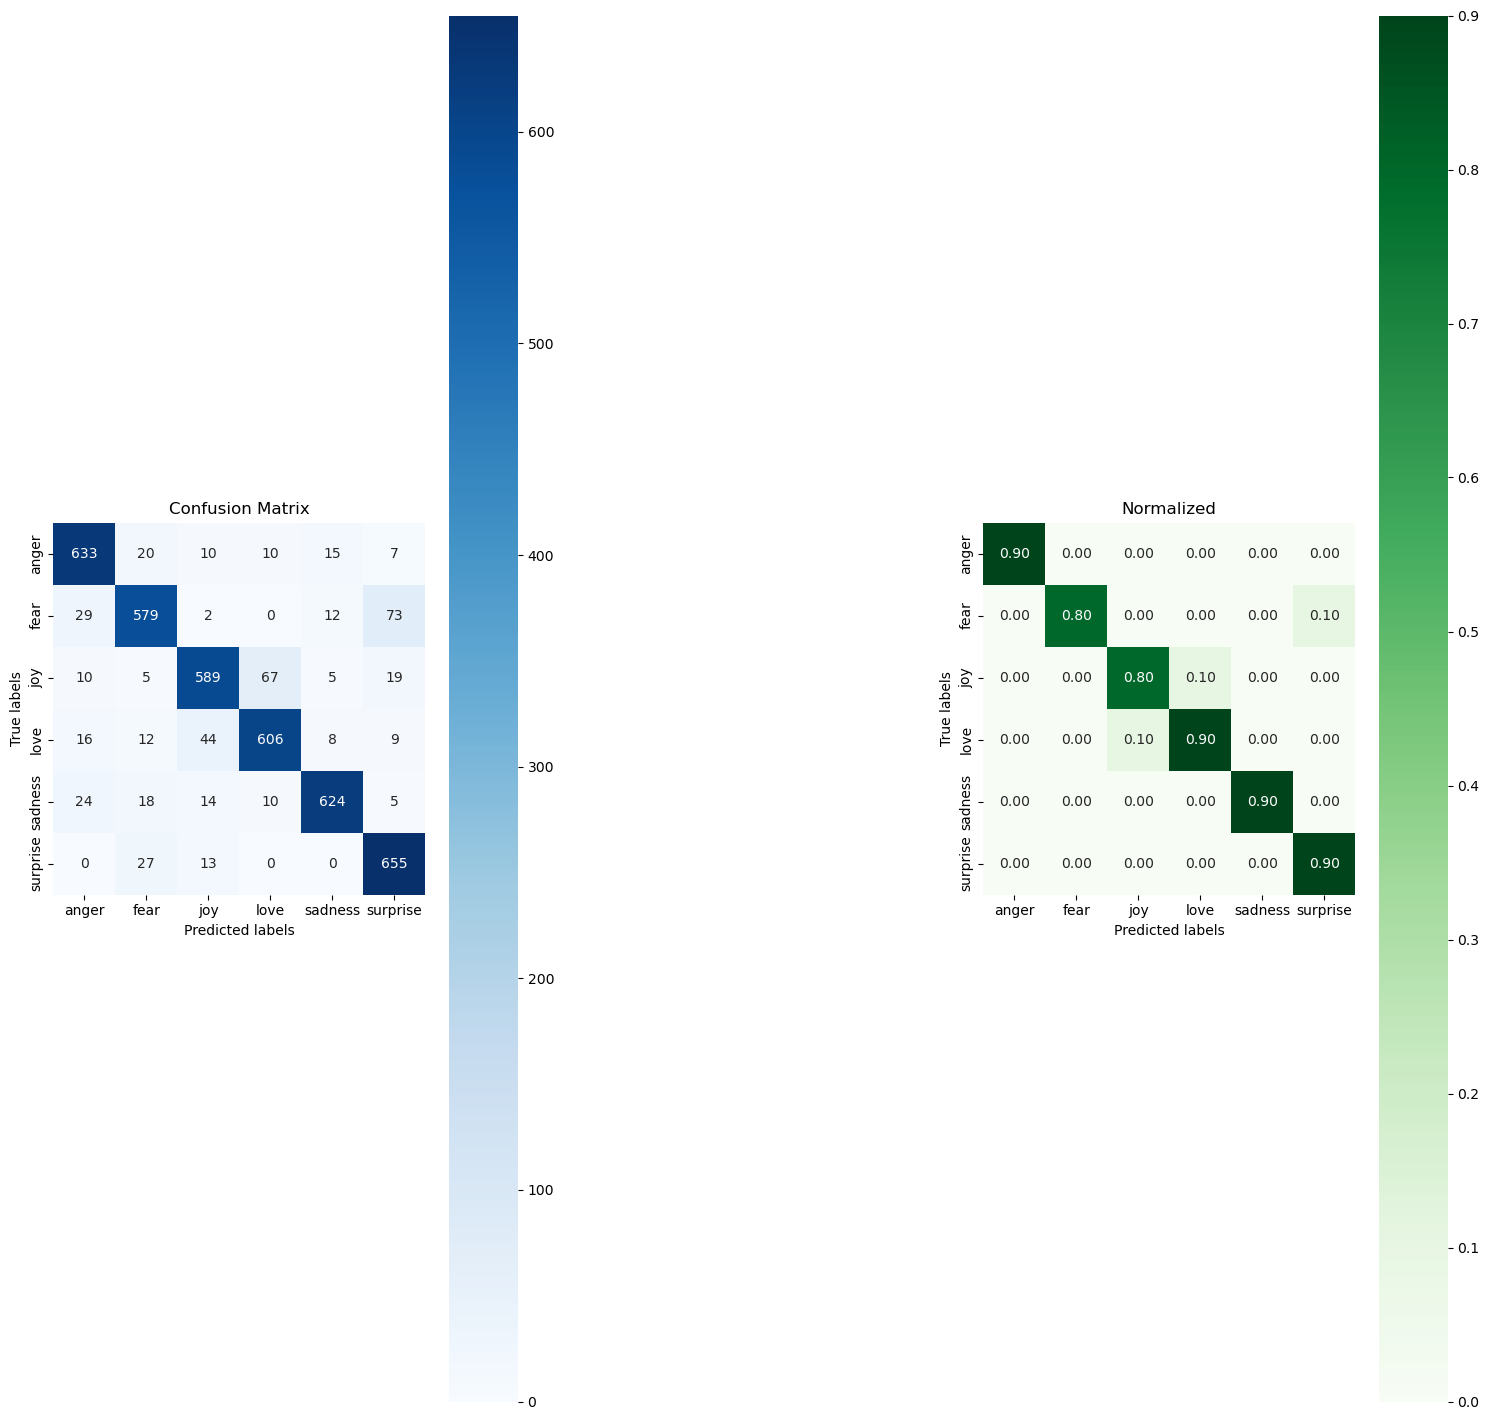

In [19]:
performance_evaluation()

# Save the chosen model and Vectorizer 

In [20]:
def train_models():
    file = open('C:/Users/Asus/PYTHON_C/DLBBT01/src/3.code_model_deploy/vectorizer.pickle','wb')
    pickle.dump(cv, file)
    file.close()

    file = open('C:/Users/Asus/PYTHON_C/DLBBT01/src/3.code_model_deploy/model.pickle','wb')
    pickle.dump(clf, file)
    file.close()
    
    print("Models saved")

In [21]:
train_models()

Models saved


# Load model and Vectorizer

In [22]:
def load_models():  
       
    # Load the vectorizer.
    file = open('C:/Users/Asus/PYTHON_C/DLBBT01/src/3.code_model_deploy/vectorizer.pickle', 'rb')
    vectorizer = pickle.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('C:/Users/Asus/PYTHON_C/DLBBT01/src/3.code_model_deploy/vectorizer.pickle', 'rb')
    model = pickle.load(file)
    file.close()
    
    return vectorizer, model